In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from icecream import ic
# Add column names for the iris dataset

local_path = Path(r'Dataset/Winequality/winequality-white.csv')

if not local_path.exists():
	ic(f"Local file {local_path} not found — downloading from UCI repository")
	url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'
	df = pd.read_csv(url, sep=';')
	# save a local copy using the same separator to avoid future parsing issues
	local_path.parent.mkdir(parents=True, exist_ok=True)
	df.to_csv(local_path, index=False, sep=';')
else:
	df = pd.read_csv(local_path, sep=';')

df.describe()

ic| f"Local file {local_path} not found — downloading from UCI repository

": 'Local file Dataset\\Winequality\\winequality-white.csv not found — downloading from UCI repository'


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


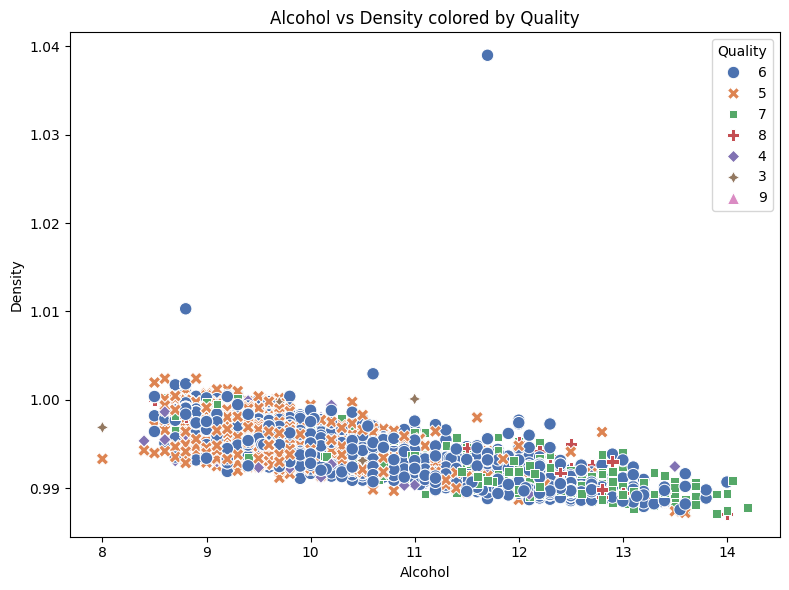

In [4]:
plt.figure(figsize=(8,6))
# use columns that exist in the winequality dataset; treat quality as categorical for hue/style
df_plot = df.copy()
df_plot['quality_str'] = df_plot['quality'].astype(str)

sns.scatterplot(data=df_plot, x='alcohol', y='density', hue='quality_str', style='quality_str', palette='deep', s=80)
plt.title('Alcohol vs Density colored by Quality')
plt.xlabel('Alcohol')
plt.ylabel('Density')
plt.legend(title='Quality')
plt.tight_layout()
plt.show()

Daten wurden importiert. nun sollen Sie einigermaßen visualisiert werden


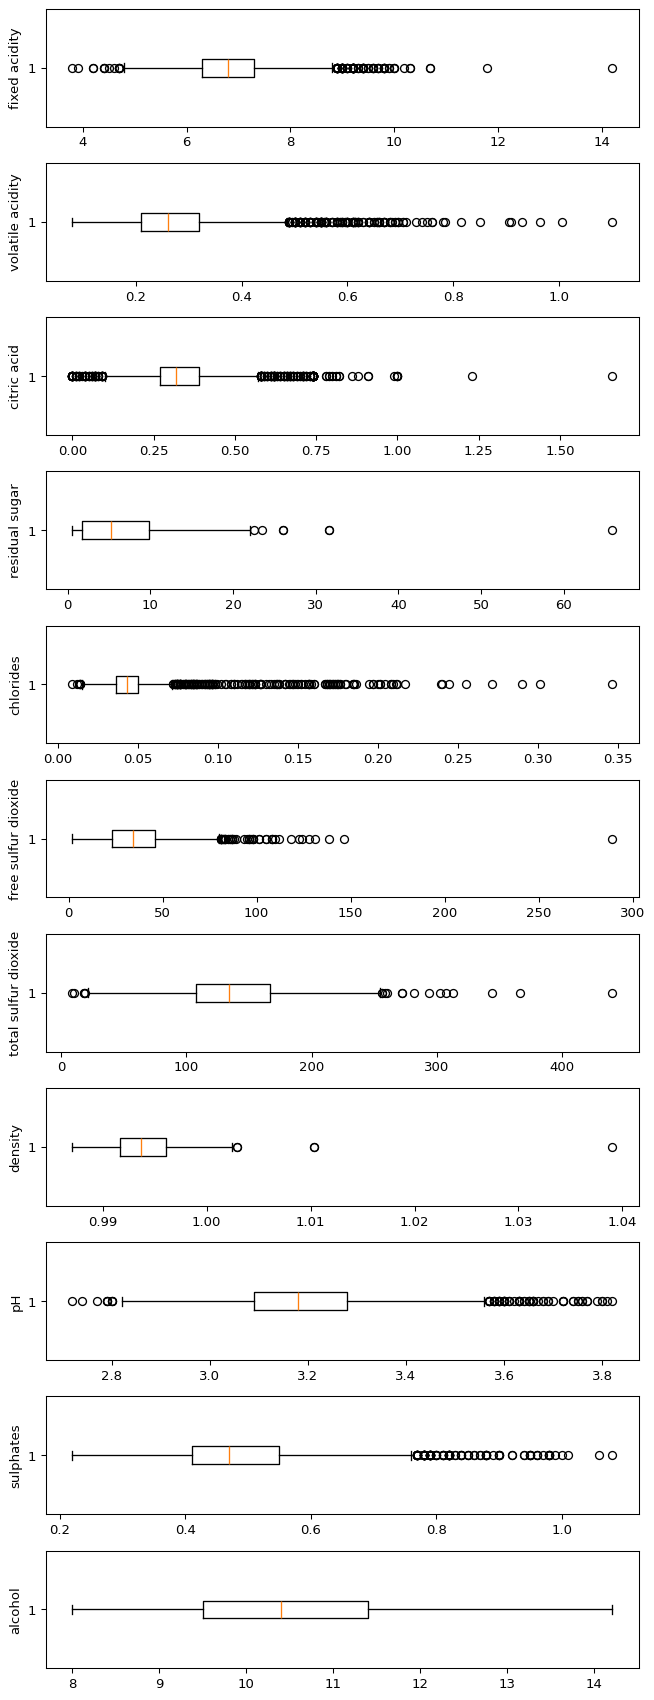

In [6]:


# Select numeric columns from df and exclude the target column 'quality'
# This avoids relying on a previously (and possibly undefined) variable numeric_cols
num_cols = [c for c in df.select_dtypes(include=['number']).columns if c != 'quality']

fig, axs = plt.subplots(len(num_cols), 1, figsize=(7, 18), dpi=95)
# If there's only one axis, make it iterable for consistent indexing
if len(num_cols) == 1:
    axs = [axs]

for i, col in enumerate(num_cols):
    axs[i].boxplot(df[col].dropna().astype(float), vert=False)
    axs[i].set_ylabel(col)
plt.tight_layout()
plt.show()

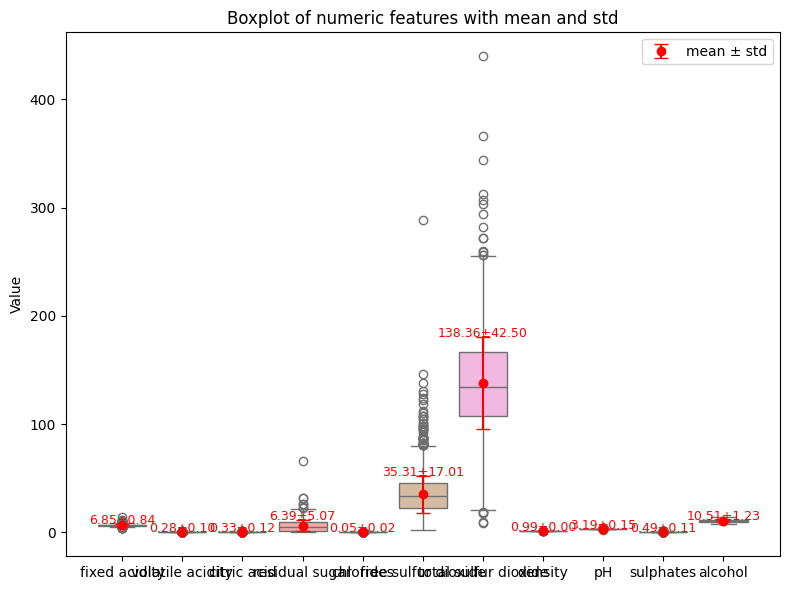

In [7]:
df.describe()

# use the already-defined list of numeric columns (num_cols) instead of undefined "columns"
numeric_cols = num_cols

# convert means/stds to numpy arrays so they align with integer x positions
means = df[numeric_cols].mean().values
stds = df[numeric_cols].std().values

plt.figure(figsize=(8,6))
sns.boxplot(data=df[numeric_cols], palette='pastel')
x = list(range(len(numeric_cols)))
plt.errorbar(x, means, yerr=stds, fmt='o', color='red', capsize=5, label='mean ± std')
plt.scatter(x, means, color='red')
for i, (m, s) in enumerate(zip(means, stds)):
    plt.text(i, m + s + 0.02, f'{m:.2f}±{s:.2f}', ha='center', color='red', fontsize=9)

plt.title('Boxplot of numeric features with mean and std')
plt.ylabel('Value')
plt.xticks(ticks=x, labels=numeric_cols)
plt.legend()
plt.tight_layout()
plt.show()

Heatmap of correlated Features



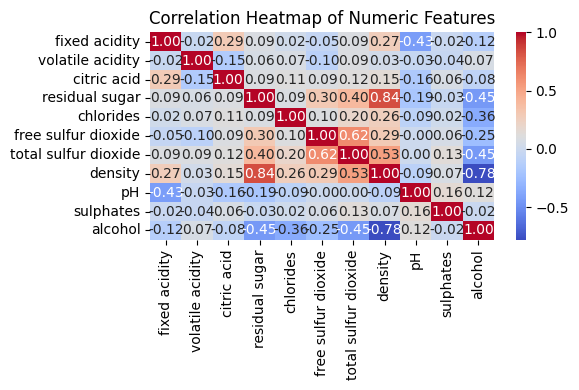

In [8]:
numeric_cols = num_cols
corr = df[numeric_cols].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()

Vizualize target variable Distribution


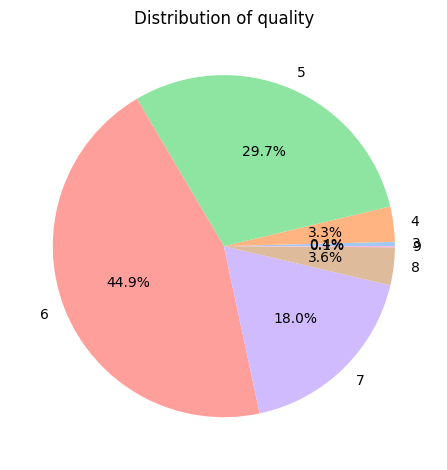

In [10]:
# use the 'quality' column (this dataset does not have 'species')
counts = df['quality'].value_counts().sort_index()
plt.pie(counts, labels=counts.index.astype(str), autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title("Distribution of quality")
plt.tight_layout()
plt.show()

Sooo und nun widmen wir uns der Linearen Regression an! 

Dazu brauchen wir dann die Vektoren anhand eine Unterscheidung gehen könnte. 

y = target
x = features


In [12]:
# increase max_iter to ensure convergence for multiclass problems
model = LogisticRegression(max_iter=200, random_state=0)

X = df[num_cols]

# use the correct target column present in the dataset
Y = df['quality']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.58, random_state=42)

model.fit(X_train, Y_train)

acc = accuracy_score(Y_test, model.predict(X_test)) * 100
print(f"Logistic Regression model accuracy: {acc:.2f}%")




Logistic Regression model accuracy: 47.45%


c:\Users\zar_p\Documents\00_Programsa\machine_learning\small_projects\SciKitLearnings\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier


classifier = DecisionTreeClassifier()

cross_val_score(classifier, X, Y, cv=5)



array([0.37959184, 0.38061224, 0.39489796, 0.43820225, 0.41368744])

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=3,
            init = 'random',
            n_init = 10,
            max_iter = 300,
            tol = 1e-04,
            random_state = 0

            )

y_km = km.fit_predict(X_train)


In [ ]:
plt.scatter(X[y_km == 0,0],
            X[y_km == 0,1],
            s = 50,
            c='lightgreen',
            marker = 's',
            edgecolor = 'black',
            label = 'Cluster 1')

plt.show()